In [1]:
import pandas            as pd
import numpy             as np
import datetime          as dt
import matplotlib.pyplot as plt
import seaborn           as sns

from unidecode           import unidecode

In [2]:
ipos = pd.read_csv('data/ofertas_publicas_e_ipos.csv')
ipos.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,DADOS DA COMPANHIA,NaN,NaN,NaN,INFORMAÇÕES DA OFERTA,NaN,NaN,NaN,NaN,...,NaN,PARTICIPAÇÃO DOS INVESTIDORES (%) ³,NaN,NaN,NaN,NaN,VOLUME TOTAL (R$),NaN,NaN,NaN
1,NaN,NOME DE PREGÃO,LISTAGEM NA OFERTA,CLASSIFICAÇÃO SETORIAL (SEGMENTO),COORDENADOR LÍDER,CLASSIFICAÇÃO,TIPO,FIXAÇÃO DE PREÇO,PREÇO POR AÇÃO / UNIT / BDR (LÇTO.)4,INÍCIO DE NEGOCIAÇÃO,...,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,NaN,ANO,IPO,FOLLOW-ON,TOTAL
2,NaN,CCR RODOVIAS,NM,Exploração de Rodovias,UBS,FOLLOW-ON,ICVM 400,4/26/2004,"R$ 23,50",27/04/04,...,375.000.005,7%,18%,75%,1%,NaN,2004,4.487.065.024,4.317.579.322,8.804.644.346
3,NaN,NATURA,NM,Prod. de Uso Pessoal,UBS,IPO,ICVM 400,5/24/2004,"R$ 36,50",26/05/04,...,768.120.637,14%,15%,67%,4%,NaN,2005,5.447.335.660,8.488.868.795,13.936.204.455
4,NaN,GOL,N2,Transporte Aéreo,Morgan Stanley,IPO,ICVM 400,6/23/2004,"R$ 26,57",24/06/04,...,878.138.500,10%,13%,75%,1%,NaN,2006,15.373.613.634,15.062.683.258,30.436.296.892


In [3]:
# Removing unecessary rows and columns
ipos.dropna(axis=1, how='all', inplace=True) 
ipos.drop(ipos.columns[-4:], axis=1,inplace=True) 
ipos.drop(ipos.tail(6).index, inplace=True) 

In [4]:
# Correct columns naming
ipos.columns = [unidecode(col_name.lower().replace(' ', '_')) for col_name in ipos.iloc[1]] 
ipos.rename(columns = {'preco_por_acao_/_unit_/_bdr_(lcto.)4':'preco_por_acao',
                    'classificacao_setorial_(segmento)':'segmento'},
           inplace = True)
ipos.drop([0,1], inplace=True)
ipos.head()

,nome_de_pregao,listagem_na_oferta,segmento,coordenador_lider,classificacao,tipo,fixacao_de_preco,preco_por_acao,inicio_de_negociacao,no_de_pessoas_fisicas,_no_total_de_investidores_,_volume_primaria_(r$)_,_volume_secundaria_(r$)_,volume_total_(r$),varejo,institucional,estrangeiros,outros
2,CCR RODOVIAS,NM,Exploração de Rodovias,UBS,FOLLOW-ON,ICVM 400,4/26/2004,"R$ 23,50",27/04/04,1.010,1.514,375.000.005,-,375.000.005,7%,18%,75%,1%
3,NATURA,NM,Prod. de Uso Pessoal,UBS,IPO,ICVM 400,5/24/2004,"R$ 36,50",26/05/04,4.376,5.460,-,768.120.637,768.120.637,14%,15%,67%,4%
4,GOL,N2,Transporte Aéreo,Morgan Stanley,IPO,ICVM 400,6/23/2004,"R$ 26,57",24/06/04,11.274,12.380,498.187.500,379.951.000,878.138.500,10%,13%,75%,1%
5,ALL AMER LAT,N2,Transporte Ferroviário,Pactual,IPO,ICVM 400,6/23/2004,"R$ 46,50",25/06/04,3.275,4.198,267.375.000,320.850.000,588.225.000,8%,20%,71%,1%
6,WEG,N1,"Motores, Compressores e Outros",Bradesco BBI,FOLLOW-ON,ICVM 400,9/3/2004,"R$ 7,20",06/09/04,5.130,5.708,-,319.384.800,319.384.800,30%,24%,41%,5%


In [5]:
# Filter just IPOs
ipos = ipos[ipos.classificacao == 'IPO']

In [6]:
# Change column datatype
ipos['inicio_de_negociacao'] = pd.to_datetime(ipos['inicio_de_negociacao'])

In [7]:
# Remove currency and change datatype
ipos['preco_por_acao'] = ipos['preco_por_acao'].replace('[R$]','', regex=True)
ipos['preco_por_acao'] = ipos['preco_por_acao'].replace('\.','', regex=True)
ipos['preco_por_acao'] = ipos['preco_por_acao'].replace(',','.', regex=True).astype(float)

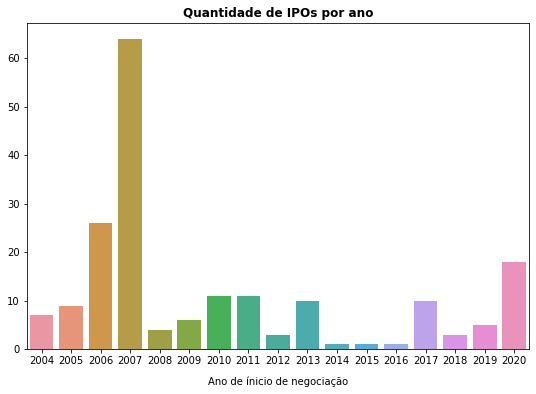

In [8]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x=ipos.inicio_de_negociacao.dt.year , data=ipos)
ax = plt.title('Quantidade de IPOs por ano', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Ano de ínicio de negociação', labelpad = 10, fontsize = 10)
ax = plt.ylabel('')  

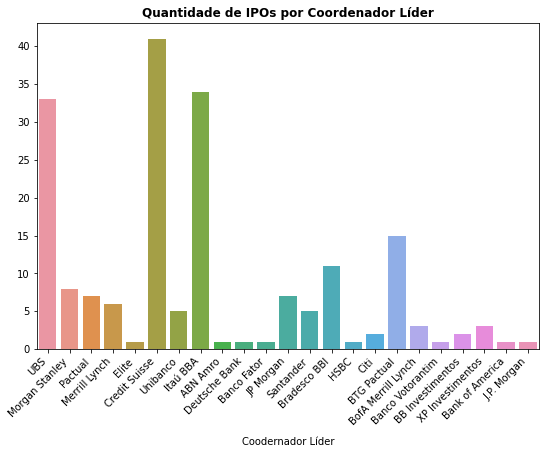

In [20]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='coordenador_lider' , data=ipos)
ax = plt.title('Quantidade de IPOs por Coordenador Líder', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Coodernador Líder', labelpad = 10, fontsize = 10)
ax = plt.ylabel('')  
ax = plt.xticks(rotation = 45, ha='right')

In [10]:
# Get data about Economic Sectors
from pandas import ExcelFile
xls = ExcelFile('data/Setorial.xlsx')
sectors = xls.parse(xls.sheet_names[0])
sectors.head()

,CLASSIFICAÇÃO SETORIAL DAS EMPRESAS NEGOCIADAS NA B3,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [11]:
# Correct columns naming
sectors.rename(columns={'CLASSIFICAÇÃO SETORIAL DAS EMPRESAS NEGOCIADAS NA B3': 'setor_economico',
 'Unnamed: 1': 'subsetor',
 'Unnamed: 2': 'segmento',
 'Unnamed: 3': 'codigo',
 'Unnamed: 4': 'nivel_governanca'}, inplace = True)

In [12]:
# Removing unecessary rows and columns
sectors.drop(sectors.head(5).index, inplace=True)
sectors.drop(sectors.head(2).index, inplace=True)
sectors.drop(sectors.tail(18).index, inplace=True)

In [13]:
# Filter just Economic Sectors names
sectors = sectors[(sectors.segmento.isnull() == False) & (sectors.codigo.isnull() == True)]
# Droping unecessary columns
sectors.drop(sectors.columns[-2:], axis=1, inplace=True)
# Fill missing data
sectors[['setor_economico','subsetor']] = sectors[['setor_economico','subsetor']].fillna(method='ffill')

In [14]:
ipos = pd.merge(ipos, sectors, how='left', on='segmento')

In [15]:
# Some Economic Segments are duplicated, so first we will find them 
duplicated_segments = sectors[sectors.duplicated(subset=['segmento'], keep=False)]['segmento']
duplicated_segments = list(set(duplicated_segments))
ipos[ipos['segmento'].isin(duplicated_segments)].head()

,nome_de_pregao,listagem_na_oferta,segmento,coordenador_lider,classificacao,tipo,fixacao_de_preco,preco_por_acao,inicio_de_negociacao,no_de_pessoas_fisicas,_no_total_de_investidores_,_volume_primaria_(r$)_,_volume_secundaria_(r$)_,volume_total_(r$),varejo,institucional,estrangeiros,outros,setor_economico,subsetor
22,ABNOTE,NM,Serviços Diversos,UBS,IPO,ICVM 400,4/25/2006,17.0,2006-04-27,15.132,16.861,-,480.434.790,480.434.790,8%,21%,70%,1%,Bens Industriais,Construção e Engenharia
23,ABNOTE,NM,Serviços Diversos,UBS,IPO,ICVM 400,4/25/2006,17.0,2006-04-27,15.132,16.861,-,480.434.790,480.434.790,8%,21%,70%,1%,Bens Industriais,Serviços Diversos
24,CSU CARDSYST,NM,Serviços Diversos,Credit Suisse,IPO,ICVM 400,4/27/2006,18.0,2006-02-05,14.362,15.585,100.288.746,240.683.832,340.972.578,9%,16%,72%,4%,Bens Industriais,Construção e Engenharia
25,CSU CARDSYST,NM,Serviços Diversos,Credit Suisse,IPO,ICVM 400,4/27/2006,18.0,2006-02-05,14.362,15.585,100.288.746,240.683.832,340.972.578,9%,16%,72%,4%,Bens Industriais,Serviços Diversos
62,CREMER,NM,Medicamentos e Outros Produtos,Merrill Lynch,IPO,ICVM 400,4/26/2007,17.5,2007-04-30,9.370,9.717,210.000.000,341.631.500,551.631.500,9%,16%,76%,0%,Saúde,Medicamentos e Outros Produtos


In [16]:
# Once the duplicates were found a researched the companies one-by-one and 
# droped the rows cointaing the wrong informatio about the Economic Sectors.
ipos = ipos.drop([22,24,63,125,137,157,165,182,184,189,193])

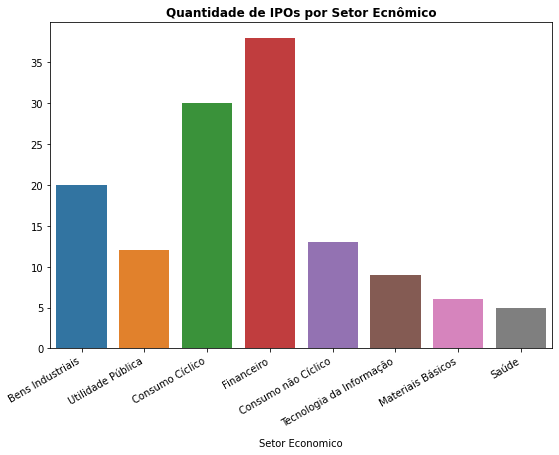

In [19]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='setor_economico' , data=ipos)
ax = plt.title('Quantidade de IPOs por Setor Ecnômico', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Setor Economico', labelpad = 10, fontsize = 10)
ax = plt.ylabel('')  
ax = plt.xticks(rotation = 30, ha='right')

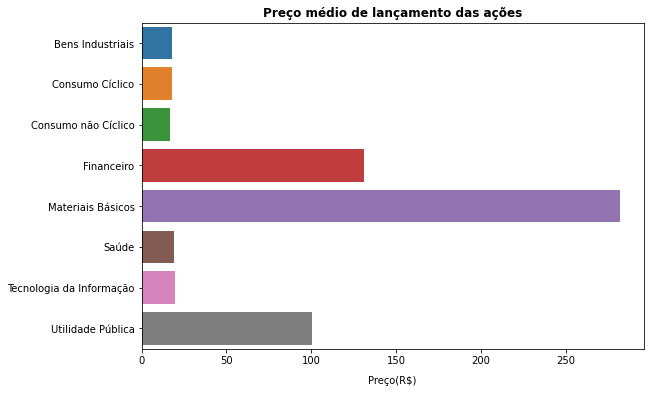

In [18]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='preco_por_acao', 
                 y='setor_economico', 
                 data=ipos.groupby('setor_economico')['preco_por_acao'].mean().reset_index())
ax = plt.title('Preço médio de lançamento das ações', fontsize = 12, fontweight = 'bold')
ax = plt.xlabel('Preço(R$)', labelpad = 10, fontsize = 10)
ax = plt.ylabel('') 